In [2]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/intership/automobileEDA (2).csv")
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.955556,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [4]:
df.describe()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [5]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

In [6]:
df['normalized-losses'].loc[df['normalized-losses'] == '?'].count()

0

In [7]:
missing_data=df.isnull()
missing_data


,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
199,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
for coloum in missing_data.columns:
  print(coloum)
  print(missing_data[coloum].value_counts())
  

symboling
False    201
Name: symboling, dtype: int64
normalized-losses
False    201
Name: normalized-losses, dtype: int64
make
False    201
Name: make, dtype: int64
aspiration
False    201
Name: aspiration, dtype: int64
num-of-doors
False    201
Name: num-of-doors, dtype: int64
body-style
False    201
Name: body-style, dtype: int64
drive-wheels
False    201
Name: drive-wheels, dtype: int64
engine-location
False    201
Name: engine-location, dtype: int64
wheel-base
False    201
Name: wheel-base, dtype: int64
length
False    201
Name: length, dtype: int64
width
False    201
Name: width, dtype: int64
height
False    201
Name: height, dtype: int64
curb-weight
False    201
Name: curb-weight, dtype: int64
engine-type
False    201
Name: engine-type, dtype: int64
num-of-cylinders
False    201
Name: num-of-cylinders, dtype: int64
engine-size
False    201
Name: engine-size, dtype: int64
fuel-system
False    201
Name: fuel-system, dtype: int64
bore
False    201
Name: bore, dtype: int64
stroke
Fal

In [9]:
df["stroke"].value_counts()

3.40    19
3.03    14
3.23    14
3.15    14
3.39    13
2.64    11
3.29     9
3.35     9
3.46     8
3.07     6
3.58     6
3.50     6
3.27     6
3.41     6
3.19     6
3.52     5
3.64     5
3.47     4
3.86     4
3.54     4
3.90     3
3.11     3
2.90     3
3.08     2
2.19     2
2.68     2
3.10     2
4.17     2
2.80     2
3.12     1
3.21     1
2.07     1
2.36     1
3.16     1
2.76     1
2.87     1
Name: stroke, dtype: int64

In [10]:
import numpy as np


In [11]:
df["stroke"].replace(np.nan,df["stroke"].mean(),inplace=True)

In [12]:
df["horsepower-binned"].value_counts()

Low       115
Medium     62
High       23
Name: horsepower-binned, dtype: int64

In [14]:
mode_horsepow=df["horsepower-binned"].mode()
mode_horsepow

0    Low
dtype: object

In [18]:
df["horsepower-binned"].replace(np.nan,str(df["horsepower-binned"].mode()),inplace=True)

In [19]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    0
diesel               0
gas                  0
dtype: int64

In [21]:
df["highway-mpg"]

0      27
1      27
2      26
3      30
4      22
       ..
196    28
197    25
198    23
199    27
200    25
Name: highway-mpg, Length: 201, dtype: int64

In [22]:
df["highway-L/100"]=235/df["highway-mpg"]

In [23]:
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas,highway-L/100
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1,8.703704
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1,8.703704
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1,9.038462
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1,7.833333
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1,10.681818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1,8.392857
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.955556,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1,9.400000
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1,10.217391
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0,8.703704


In [24]:
df.drop(['city-mpg', 'highway-mpg'], axis='columns', inplace=True)

In [25]:
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km,horsepower-binned,diesel,gas,highway-L/100
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,13495.0,11.190476,Medium,0,1,8.703704
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,16500.0,11.190476,Medium,0,1,8.703704
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,16500.0,12.368421,Medium,0,1,9.038462
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,13950.0,9.791667,Medium,0,1,7.833333
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,17450.0,13.055556,Medium,0,1,10.681818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,16845.0,10.217391,Medium,0,1,8.392857
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.955556,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19045.0,12.368421,High,0,1,9.400000
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,21485.0,13.055556,Medium,0,1,10.217391
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,22470.0,9.038462,Medium,1,0,8.703704


In [26]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'horsepower bins')

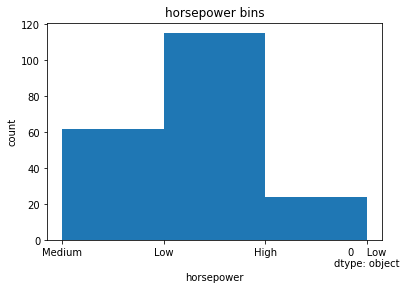

In [32]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower-binned"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

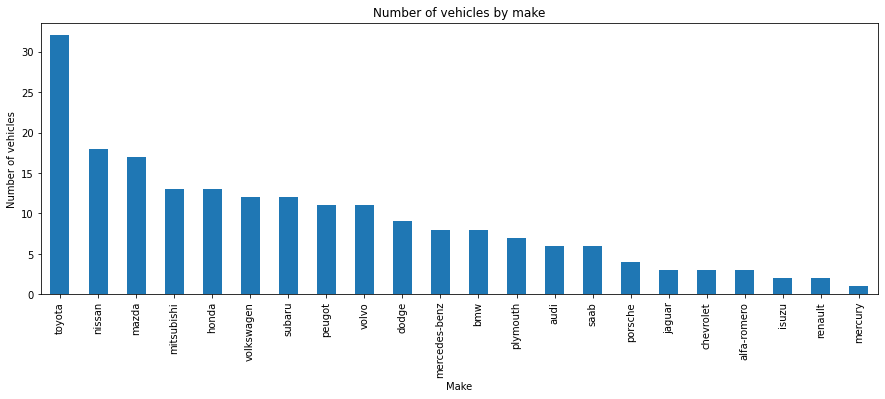

In [31]:
df.make.value_counts().plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Make');

In [33]:
import seaborn as sns

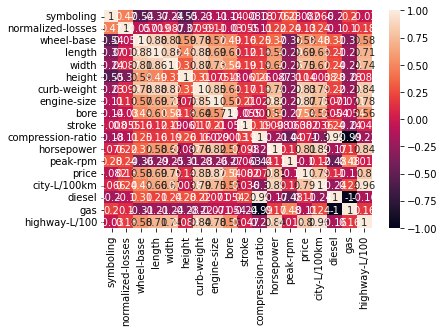

In [35]:

sns.heatmap(df.corr(),annot = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9be2c29d90>,
      dtype=object)

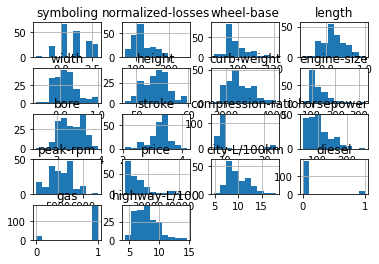

In [41]:
df.hist()

In [42]:
num_cols=list(df._get_numeric_data().columns)
print(f"Numeric variable numbers: {len(num_cols)}")

Numeric variable numbers: 18


In [43]:
num_cols

['symboling',
 'normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'price',
 'city-L/100km',
 'diesel',
 'gas',
 'highway-L/100']

In [45]:
df=pd.get_dummies(df, drop_first=True)

In [46]:
df

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km,diesel,gas,highway-L/100,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,aspiration_turbo,num-of-doors_two,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_fwd,drive-wheels_rwd,engine-location_rear,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,horsepower-binned_High,horsepower-binned_Low,horsepower-binned_Medium
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,13495.0,11.190476,0,1,8.703704,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,16500.0,11.190476,0,1,8.703704,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,16500.0,12.368421,0,1,9.038462,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,13950.0,9.791667,0,1,7.833333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,17450.0,13.055556,0,1,10.681818,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,109.1,0.907256,0.956944,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,16845.0,10.217391,0,1,8.392857,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
197,-1,95,109.1,0.907256,0.955556,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19045.0,12.368421,0,1,9.400000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
198,-1,95,109.1,0.907256,0.956944,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,21485.0,13.055556,0,1,10.217391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
199,-1,95,109.1,0.907256,0.956944,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,22470.0,9.038462,1,0,8.703704,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1


In [48]:
for i in df.columns:
  if((df[i].corr(df["price"]))<0.1 and (df[i].corr(df["price"]))> -0.1):
    print(i+" this column can be deleted becuase correlation value is very less and not linearly dependent")

symboling this column can be deleted becuase correlation value is very less and not linearly dependent
stroke this column can be deleted becuase correlation value is very less and not linearly dependent
compression-ratio this column can be deleted becuase correlation value is very less and not linearly dependent
make_isuzu this column can be deleted becuase correlation value is very less and not linearly dependent
make_mazda this column can be deleted becuase correlation value is very less and not linearly dependent
make_mercury this column can be deleted becuase correlation value is very less and not linearly dependent
make_peugot this column can be deleted becuase correlation value is very less and not linearly dependent
make_renault this column can be deleted becuase correlation value is very less and not linearly dependent
make_saab this column can be deleted becuase correlation value is very less and not linearly dependent
make_volkswagen this column can be deleted becuase correla

In [49]:
a=[]
for i in df.columns:
  if((df[i].corr(df["price"]))>0.1 or (df[i].corr(df["price"]))< -0.1):
    a.append(i)

In [50]:
a

['normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'horsepower',
 'peak-rpm',
 'price',
 'city-L/100km',
 'diesel',
 'gas',
 'highway-L/100',
 'make_audi',
 'make_bmw',
 'make_chevrolet',
 'make_dodge',
 'make_honda',
 'make_jaguar',
 'make_mercedes-benz',
 'make_mitsubishi',
 'make_nissan',
 'make_plymouth',
 'make_porsche',
 'make_subaru',
 'make_toyota',
 'make_volvo',
 'aspiration_turbo',
 'body-style_hardtop',
 'body-style_hatchback',
 'body-style_sedan',
 'drive-wheels_fwd',
 'drive-wheels_rwd',
 'engine-location_rear',
 'engine-type_ohc',
 'engine-type_ohcv',
 'num-of-cylinders_five',
 'num-of-cylinders_four',
 'num-of-cylinders_six',
 'num-of-cylinders_twelve',
 'fuel-system_2bbl',
 'fuel-system_idi',
 'fuel-system_mpfi',
 'horsepower-binned_High',
 'horsepower-binned_Low',
 'horsepower-binned_Medium']

In [53]:
df_new=df[a]
df_new

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,horsepower,peak-rpm,price,city-L/100km,diesel,gas,highway-L/100,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_jaguar,make_mercedes-benz,make_mitsubishi,make_nissan,make_plymouth,make_porsche,make_subaru,make_toyota,make_volvo,aspiration_turbo,body-style_hardtop,body-style_hatchback,body-style_sedan,drive-wheels_fwd,drive-wheels_rwd,engine-location_rear,engine-type_ohc,engine-type_ohcv,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_twelve,fuel-system_2bbl,fuel-system_idi,fuel-system_mpfi,horsepower-binned_High,horsepower-binned_Low,horsepower-binned_Medium
0,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,111.0,5000.0,13495.0,11.190476,0,1,8.703704,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
1,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,111.0,5000.0,16500.0,11.190476,0,1,8.703704,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
2,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,154.0,5000.0,16500.0,12.368421,0,1,9.038462,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1
3,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,102.0,5500.0,13950.0,9.791667,0,1,7.833333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1
4,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,115.0,5500.0,17450.0,13.055556,0,1,10.681818,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,95,109.1,0.907256,0.956944,55.5,2952,141,3.78,114.0,5400.0,16845.0,10.217391,0,1,8.392857,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1
197,95,109.1,0.907256,0.955556,55.5,3049,141,3.78,160.0,5300.0,19045.0,12.368421,0,1,9.400000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0
198,95,109.1,0.907256,0.956944,55.5,3012,173,3.58,134.0,5500.0,21485.0,13.055556,0,1,10.217391,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1
199,95,109.1,0.907256,0.956944,55.5,3217,145,3.01,106.0,4800.0,22470.0,9.038462,1,0,8.703704,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1


In [59]:
c=["price"]
b=[i for i in a if i!="price"]
len(b)

47

In [60]:
X=df_new[b]
y=df_new[c]

In [61]:
from sklearn.model_selection import train_test_split
(X_train,X_test,y_train,y_test) = train_test_split(X,y,test_size=0.3,random_state=42)

In [62]:
from sklearn.linear_model import LinearRegression
clf=LinearRegression()
clf.fit(X_train,y_train)

LinearRegression()

In [63]:
c=clf.coef_
c

array([[-6.66342395e+00,  5.02543601e+01, -2.39855698e+04,
         3.97433115e+04, -2.64297265e+02,  6.06473177e+00,
         8.44696115e+01, -5.43331184e+03, -3.06470507e+01,
         1.29655245e+00,  8.83006326e+02,  8.70662513e+02,
        -8.70662513e+02, -3.68224426e+02,  3.35807191e+03,
         8.19885166e+03,  1.12171135e+03, -2.93484098e+03,
        -2.03605582e+02,  1.21817606e+03,  5.24853152e+03,
        -2.57280582e+03, -2.38943267e+02, -2.84698486e+03,
         8.32710295e+03,  1.85853669e+03, -7.96983308e+02,
         7.01989957e+02,  1.53645338e+03, -1.28266746e+03,
        -9.30569199e+02,  2.22122987e+02,  1.17003225e+03,
         1.88846142e+03,  8.32710295e+03,  8.09921186e+02,
        -1.29976585e+03, -7.39738372e+03, -3.53725551e+03,
        -7.02277131e+03, -5.83428244e+03,  2.20425959e+03,
         8.70662513e+02,  1.66490515e+03,  3.33359294e+03,
         6.96782741e+02,  1.80390675e+03]])

In [64]:
i=clf.intercept_
i

array([-11127.74003108])

In [66]:
y_pred=clf.predict(X_test)

In [67]:
y_pred

array([[ 6134.27397836],
       [31378.92577486],
       [ 7484.09194613],
       [ 8267.33435254],
       [10669.52280282],
       [ 4786.24022809],
       [38808.95860578],
       [ 8582.03263238],
       [16565.19475911],
       [32403.25875087],
       [25691.17987809],
       [10620.79664619],
       [11679.62579594],
       [ 8370.22019864],
       [13472.84220817],
       [ 9604.48831382],
       [ 9818.44237642],
       [ 7568.95054735],
       [ 9421.58524359],
       [37038.34315619],
       [32528.        ],
       [33534.91729315],
       [ 6504.6431753 ],
       [ 7039.62402346],
       [27289.98031556],
       [10146.87914232],
       [10387.36760217],
       [27973.38243817],
       [34077.51565984],
       [13429.64198058],
       [17885.39746093],
       [ 7835.66344655],
       [16572.39208641],
       [ 6721.10735182],
       [ 5967.4089344 ],
       [15016.17587725],
       [ 7302.05220697],
       [ 7540.23637346],
       [11236.55655669],
       [ 8133.09793246],


In [68]:
from sklearn.metrics import mean_squared_error
print('MSE of Linear Regression : ' + str(round(mean_squared_error(y_test,y_pred),2)))

MSE of Linear Regression : 5230382.64
